## Import LA and NYC dataframes, clean them and merge.

In [65]:
import csv
import pandas as pd
csvLA = "/Users/sammywhite/Downloads/Crime_Data_from_2010_to_2019.csv"
csvNYC = "/Users/sammywhite/Downloads/NYC_crime.csv"

In [154]:
#import first data source
df_LA = pd.read_csv(csvLA)
df_NYC = pd.read_csv(csvNYC)

In [155]:
#cleaning up LA
df_LA = df_LA.iloc[:,:10]
LAcolnames = ["Record Number", "Date Reported", "Date", "Time Occured", "Area Number", "Area Name", "District Number", "Part 1-2", "Crm Cd", "Desc"]
df_LA.columns = LAcolnames
df_LA = df_LA.drop(columns = ["Date Reported", "Area Number", "District Number", "Part 1-2", "Crm Cd"])
df_LA["City"] = "LA"
df_LA.head()

,Record Number,Date,Time Occured,Area Name,Desc,City
0,1307355,02/20/2010 12:00:00 AM,1350,Newton,VIOLATION OF COURT ORDER,LA
1,11401303,09/12/2010 12:00:00 AM,45,Pacific,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",LA
2,70309629,08/09/2010 12:00:00 AM,1515,Newton,OTHER MISCELLANEOUS CRIME,LA
3,90631215,01/05/2010 12:00:00 AM,150,Hollywood,VIOLATION OF COURT ORDER,LA
4,100100501,01/02/2010 12:00:00 AM,2100,Central,"RAPE, ATTEMPTED",LA


In [156]:
#cleaning up NYC
df_NYC = df_NYC.iloc[:,2:5]
df_NYC = df_NYC.drop(columns = "pd_desc")
NYCcolumns = ["Date", "Desc"]
df_NYC.columns = NYCcolumns
df_NYC["City"] = "NYC"
df_NYC.head()

,Date,Desc,City
0,2019-01-26,SEX CRIMES,NYC
1,2019-02-06,CONTROLLED SUBSTANCES OFFENSES,NYC
2,2016-01-06,RAPE,NYC
3,2018-11-15,RAPE,NYC
4,2006-09-13,CRIMINAL TRESPASS,NYC


In [157]:
#add year column to LA, make the year column an int
year = []
for i in df_LA["Date"]:
    y = i.split()[0]
    y = y[-4:]
    year.append(int(y))
    
df_LA["Year"] = year

In [158]:
#add year column to NYC, make the year column an int
year = []
for i in df_NYC["Date"]:
    y = i[:4]
    year.append(int(y))
    
df_NYC["Year"] = year

In [159]:
#remove everything from before 2010 in NYC df
df_NYC = df_NYC.loc[df_NYC["Year"]>2009]

In [160]:
#create a combined DF
df_merged = df_LA.merge(df_NYC, how="outer")
df_merged = df_merged.drop(columns = ["Time Occured", "Area Name", "Record Number"])
df_merged.head()

,Date,Desc,City,Year
0,02/20/2010 12:00:00 AM,VIOLATION OF COURT ORDER,LA,2010
1,02/20/2010 12:00:00 AM,VIOLATION OF COURT ORDER,LA,2010
2,02/20/2010 12:00:00 AM,VIOLATION OF COURT ORDER,LA,2010
3,02/20/2010 12:00:00 AM,VIOLATION OF COURT ORDER,LA,2010
4,02/20/2010 12:00:00 AM,VIOLATION OF COURT ORDER,LA,2010


## LA and NYC Analysis

When was crime most prevalent in both cities?

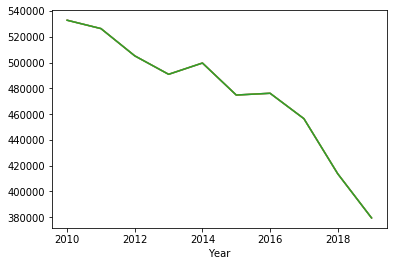

In [161]:
df_merged.groupby('Year').count().plot(kind='line', legend=False)

What were the top 10 most common crimes across both cities?

In [170]:
df_merged["Desc"].value_counts()[:10]

DANGEROUS DRUGS                       507493
ASSAULT 3 & RELATED OFFENSES          276060
BATTERY - SIMPLE ASSAULT              190551
BURGLARY                              184308
OTHER OFFENSES RELATED TO THEFT       179166
ROBBERY                               164438
BURGLARY FROM VEHICLE                 162182
VEHICLE - STOLEN                      159893
THEFT PLAIN - PETTY ($950 & UNDER)    149874
PETIT LARCENY                         140864
Name: Desc, dtype: int64

Text(0, 0.5, 'Crime Count')

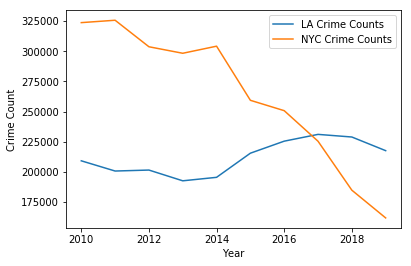

In [167]:
#find the crime count for each year by city
from matplotlib import pyplot as plt

LA_Counts = df_LA.groupby('Year').count()
NYC_Counts = df_NYC.groupby("Year").count()

plt.plot(LA_Counts["Record Number"], label="LA Crime Counts")
plt.plot(NYC_Counts["City"], label="NYC Crime Counts")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Crime Count")

NYC seems to be declining while LA is increasing, howevver NYC seems to have a higher volume until 2017

## A look at LA climbing Crime Rate

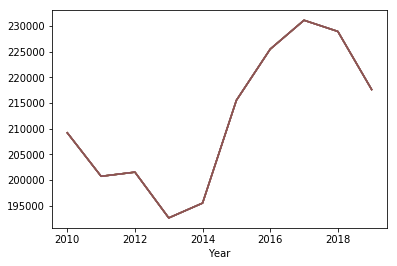

In [166]:
#just LA
df_LA.groupby('Year').count().plot(kind='line', legend=False)

LA crime peaked in 2017

In [172]:
#most popular crimes in LA 2017
LA2017 = df_LA.loc[df_LA["Year"]==2017]
LA2017["Desc"].value_counts()[:5]

BATTERY - SIMPLE ASSAULT              19092
VEHICLE - STOLEN                      18791
BURGLARY FROM VEHICLE                 18067
BURGLARY                              15300
THEFT PLAIN - PETTY ($950 & UNDER)    14746
Name: Desc, dtype: int64

In [169]:
#most popular crimes in LA overall
df_LA["Desc"].value_counts()[:5]

BATTERY - SIMPLE ASSAULT              190551
BURGLARY FROM VEHICLE                 162182
VEHICLE - STOLEN                      159893
THEFT PLAIN - PETTY ($950 & UNDER)    149874
BURGLARY                              147716
Name: Desc, dtype: int64

In [173]:
#most popular crimes in LA before 2017
LApre2017 = df_LA.loc[df_LA["Year"]<2017]
LApre2017["Desc"].value_counts()[:5]

BATTERY - SIMPLE ASSAULT              133136
BURGLARY FROM VEHICLE                 109349
VEHICLE - STOLEN                      108710
BURGLARY                              104922
THEFT PLAIN - PETTY ($950 & UNDER)    104311
Name: Desc, dtype: int64

It looks like the main crimes in LA have always been similar (no huge changes in 2017) -- Battery, Burglary, Stolen Vehicles and Petty Theft

Now lets compare this to the most common crimes in NYC

In [174]:
df_NYC["Desc"].value_counts()[:5]

DANGEROUS DRUGS                    507493
ASSAULT 3 & RELATED OFFENSES       276060
OTHER OFFENSES RELATED TO THEFT    179166
PETIT LARCENY                      140864
VEHICLE AND TRAFFIC LAWS           134653
Name: Desc, dtype: int64

## A look at Burglary in LA

In [177]:
#get a list of the burglary related crimes
burglary_list = []
for i in df_LA["Desc"]:
    crime = i.split()
    if i in burglary_list:
        continue
    else:
        if "BURGLARY" in crime:
            burglary_list.append(i)
        else:
            continue
            
burglary_list

['BURGLARY FROM VEHICLE', 'BURGLARY', 'BURGLARY FROM VEHICLE, ATTEMPTED']

In [184]:
BL0 = df_LA.loc[df_LA["Desc"] == burglary_list[0]]
BL1 = df_LA.loc[df_LA["Desc"] == burglary_list[1]]
BL2 = df_LA.loc[df_LA["Desc"] == burglary_list[2]]
BC = BL0.merge(BL1, how="outer")
burglary_crimes_LA = BC.merge(BL2, how="outer")
burglary_crimes_LA

,Record Number,Date,Time Occured,Area Name,Desc,City,Year
0,100100508,01/07/2010 12:00:00 AM,2005,Central,BURGLARY FROM VEHICLE,LA,2010
1,100100564,01/29/2010 12:00:00 AM,1630,Central,BURGLARY FROM VEHICLE,LA,2010
2,100100591,02/08/2010 12:00:00 AM,1625,Central,BURGLARY FROM VEHICLE,LA,2010
3,100100731,03/21/2010 12:00:00 AM,320,Central,BURGLARY FROM VEHICLE,LA,2010
4,100100804,04/15/2010 12:00:00 AM,335,Central,BURGLARY FROM VEHICLE,LA,2010
...,...,...,...,...,...,...,...
312739,191208454,03/06/2019 12:00:00 AM,1730,77th Street,"BURGLARY FROM VEHICLE, ATTEMPTED",LA,2019
312740,191514662,07/23/2019 12:00:00 AM,300,N Hollywood,"BURGLARY FROM VEHICLE, ATTEMPTED",LA,2019
312741,191416342,07/17/2019 12:00:00 AM,930,Pacific,"BURGLARY FROM VEHICLE, ATTEMPTED",LA,2019
312742,191805136,01/18/2019 12:00:00 AM,2200,Southeast,"BURGLARY FROM VEHICLE, ATTEMPTED",LA,2019


show burglary over time

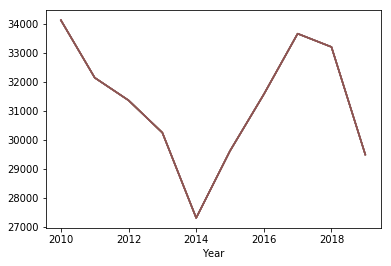

In [185]:
burglary_crimes_LA.groupby('Year').count().plot(kind='line', legend=False)

2014 dipped in burglary, what was the most common crime then?

In [186]:
df_LA.loc[df_LA["Year"]==2014]["Desc"].value_counts()[:5]

BATTERY - SIMPLE ASSAULT              18414
THEFT PLAIN - PETTY ($950 & UNDER)    15750
BURGLARY                              13963
VEHICLE - STOLEN                      13699
BURGLARY FROM VEHICLE                 13080
Name: Desc, dtype: int64

plot the top 10 crimes in LA

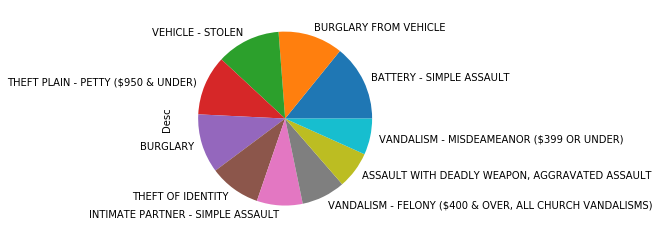

In [193]:
df_LA["Desc"].value_counts()[:10].plot(kind="pie")

ModuleNotFoundError: No module named 'snscrape'